`Datasource` : https://www.kaggle.com/asaumya/healthcare-dataset-stroke-data

- Used only train data set from data source as my whole data set, and further split it into train and test data set for this project.

- Divided the project into two parts. 

- First part - Data analysis and visualization (EDA)

- Second part - compared different algorithms on the basis of accuracy score to predict stroke based upon mentioned features


__`Data analysis and visualization (EDA)`__

In [1]:
###Import Packages
import numpy as np
import pandas as pd
from pandas import DataFrame

In [5]:
df = pd.read_csv("/Users/ansh/Desktop/Health_project/health1.csv")

In [6]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,41938.000000,43400.000000
mean,36326.142350,42.217894,0.093571,0.047512,104.482750,28.605038,0.018041
std,21072.134879,22.519649,0.291235,0.212733,43.111751,7.770020,0.133103
min,1.000000,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,18038.500000,24.000000,0.000000,0.000000,77.540000,23.200000,0.000000
50%,36351.500000,44.000000,0.000000,0.000000,91.580000,27.700000,0.000000
75%,54514.250000,60.000000,0.000000,0.000000,112.070000,32.900000,0.000000
max,72943.000000,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


In [7]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [8]:
 df.shape

(43400, 12)

In [9]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
id                   43400 non-null int64
gender               43400 non-null object
age                  43400 non-null float64
hypertension         43400 non-null int64
heart_disease        43400 non-null int64
ever_married         43400 non-null object
work_type            43400 non-null object
Residence_type       43400 non-null object
avg_glucose_level    43400 non-null float64
bmi                  41938 non-null float64
smoking_status       30108 non-null object
stroke               43400 non-null int64
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


In [11]:
import missingno as msno

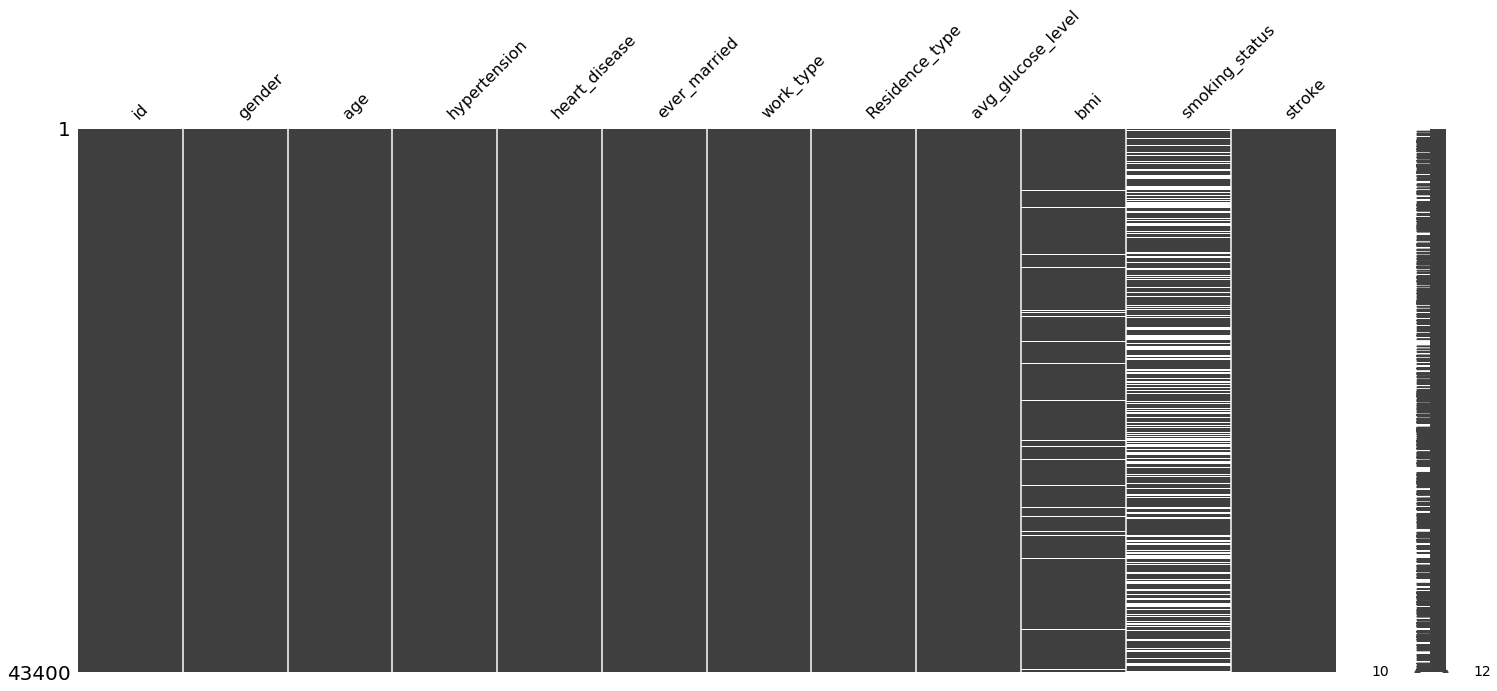

In [12]:
msno.matrix(df)

`INFERENCE` - BASED ON EDA

- The dataset is composed of 4 features float,3 features integer and 7 objects.We can see with that there are missing values in the columns “bmi”,"smoking status" and "stroke".

- About this Dataset: The dataset has 12 columns with 43400 rows. The purpose of this analysis is to test a few models in order to predict if a person will have stroke or not. The list of the features that our model will take in input will be ['Residence_type', 'age', 'avg_glucose_level', 'bmi', 'ever_married', 'gender', 'heart_disease', 'hypertension', 'smoking_status', 'work_type']and the output will be ['stroke']

- Because we have few features we can use the package missingno which allows you to display the completeness of the dataset.

- It looks there are few missing values for “bmi” and a lot of missing values in “smoking_status”.

# Univariate Analysis

To have a better vision of the data we are going to display our feature with a countplot of seaborn.
We are going to separate our features into two lists: “categ” for the categorical features and “conti” 
for the continuous features.The “age”,"average_glucose","bmi" are the  features that we can consider 
as continuous. In order to plot the distribution of the features with seaborn we are going to use distplot.

In [13]:
categ = ["Residence_type","ever_married","gender","heart_disease", "hypertension","smoking_status","work_type"]

In [14]:
conti = ["age","avg_glucose_level","bmi"]

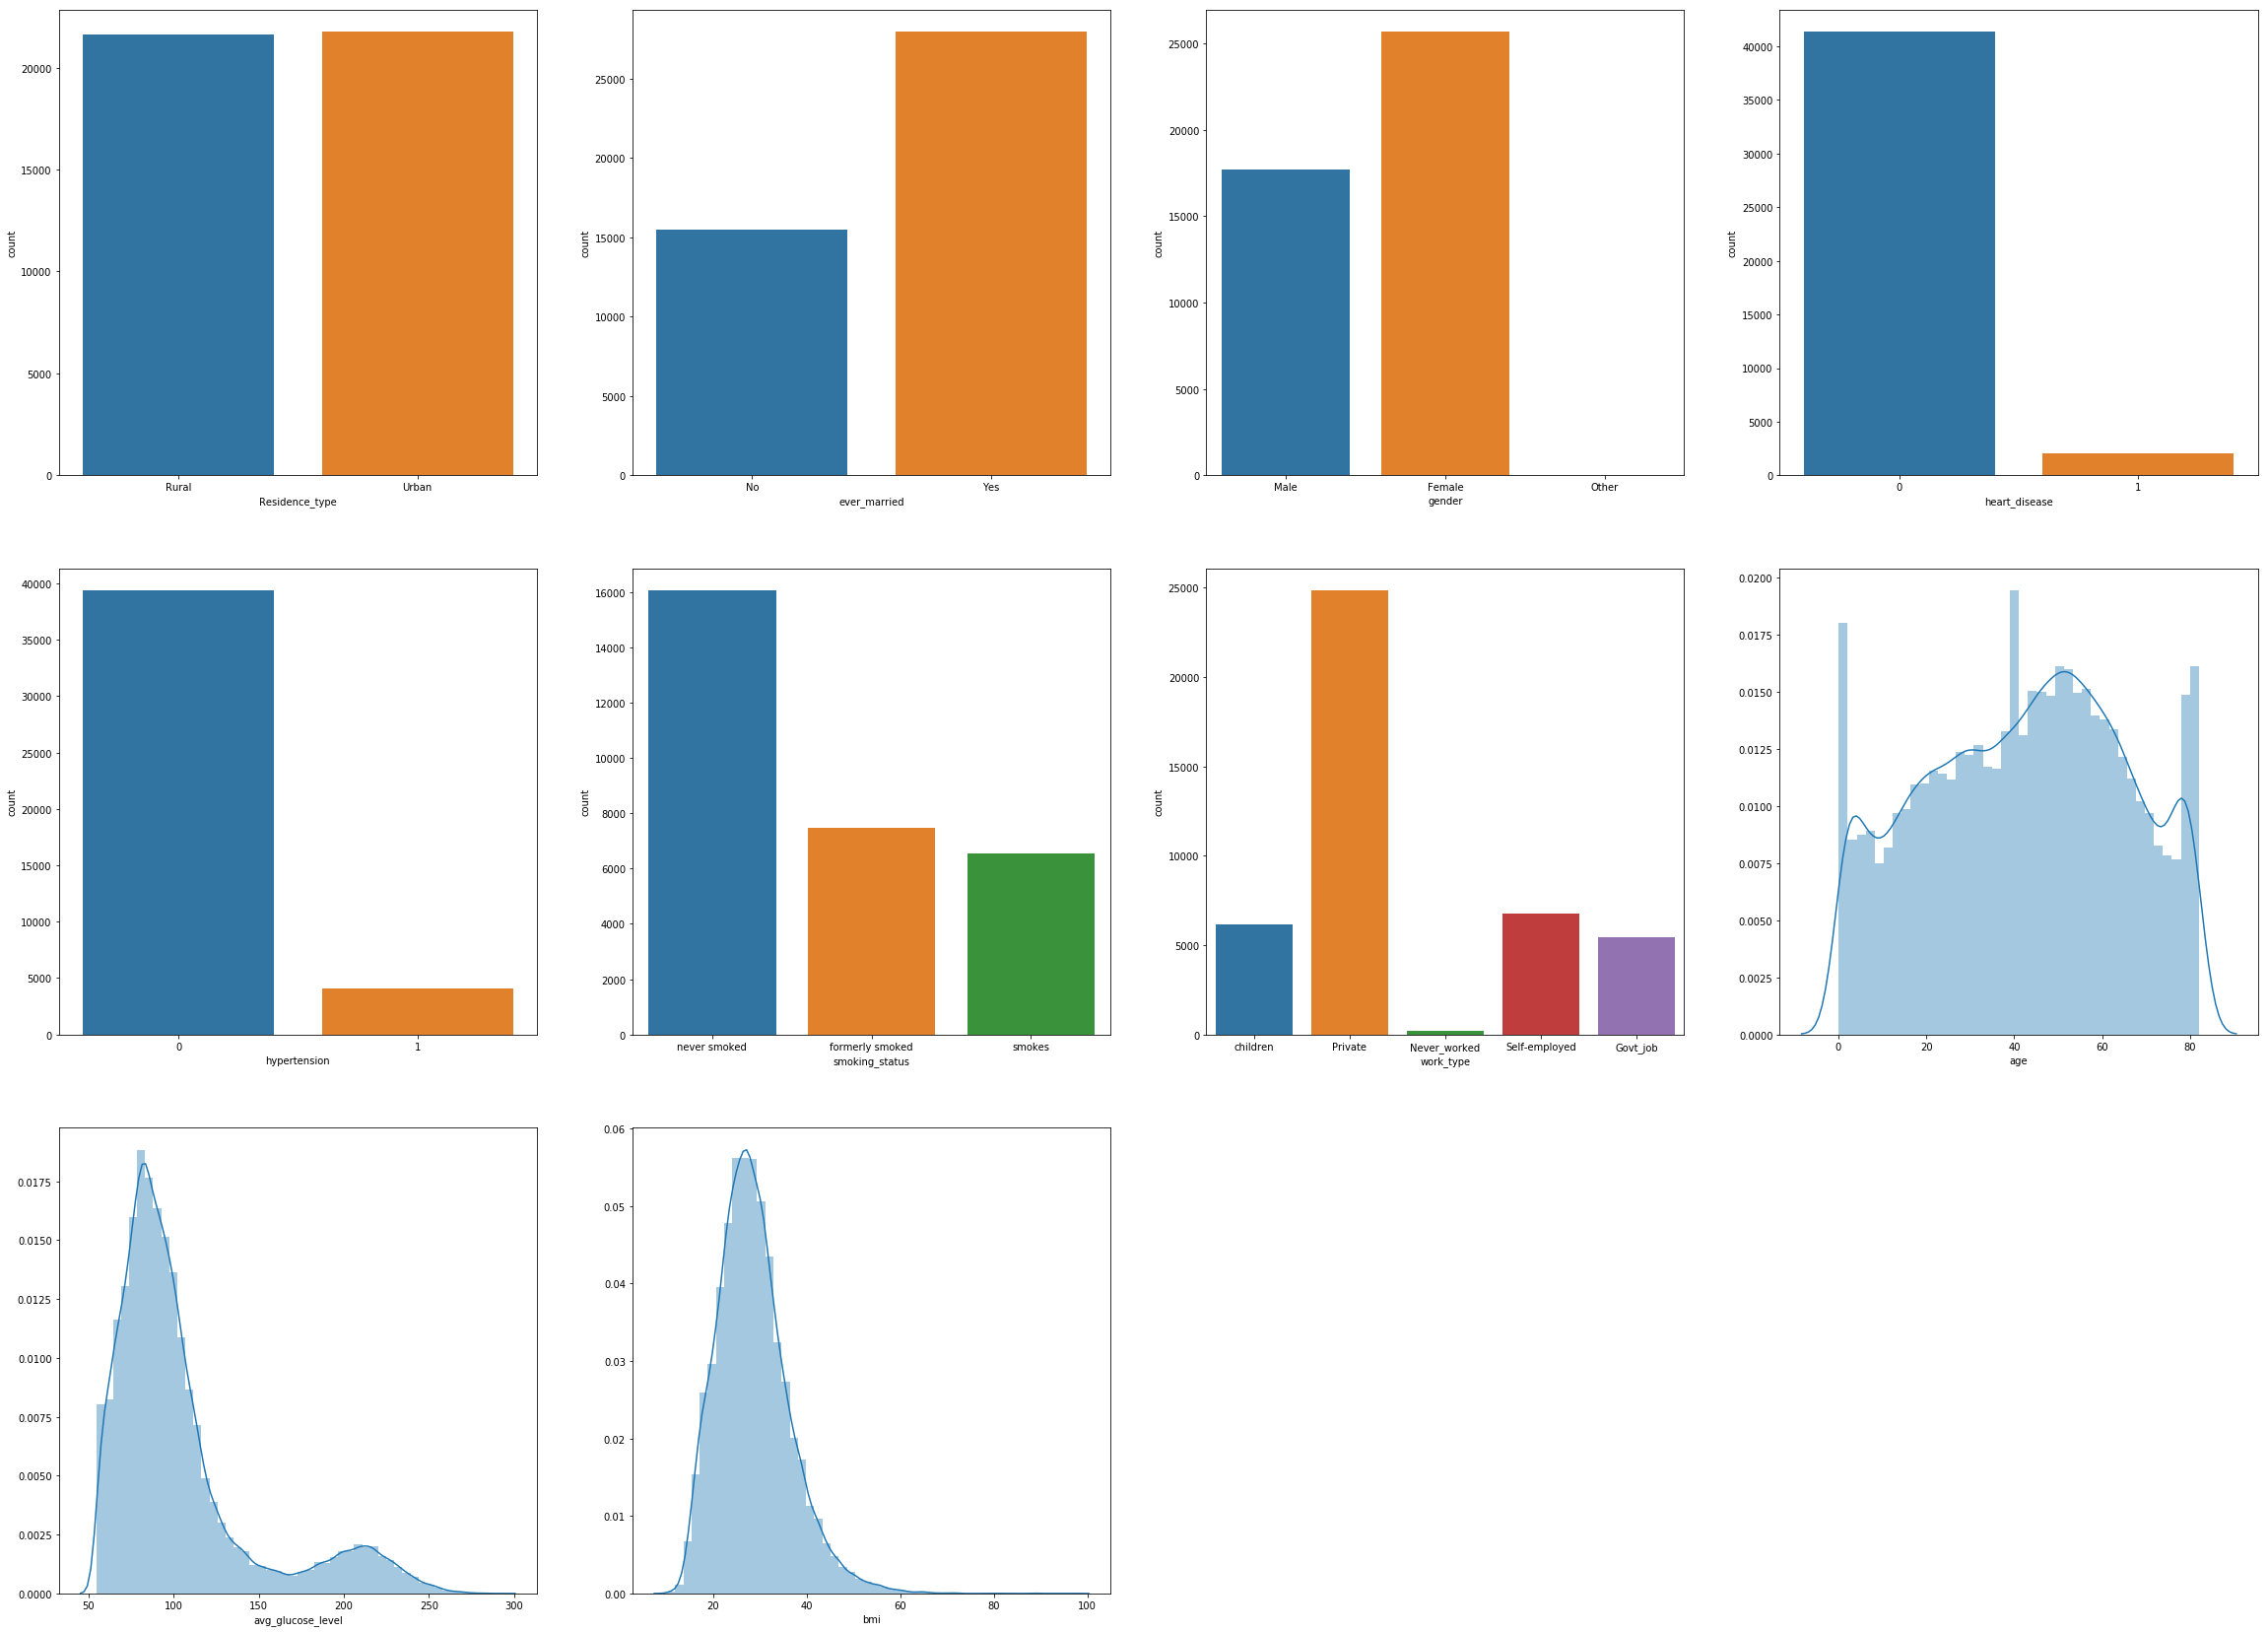

In [15]:

import matplotlib.pyplot as plt
import seaborn as sns

#Distribution
fig = plt.figure(figsize=(40, 40))
for i in range (0,len(categ)):
    fig.add_subplot(4,4,i+1)
    sns.countplot(x=categ[i], data= df);


for col in conti:
    fig.add_subplot(4,4,i + 2)
    sns.distplot(df[col].dropna());
    i += 1
    
plt.show()
fig.clear()

# Bivariate Analysis


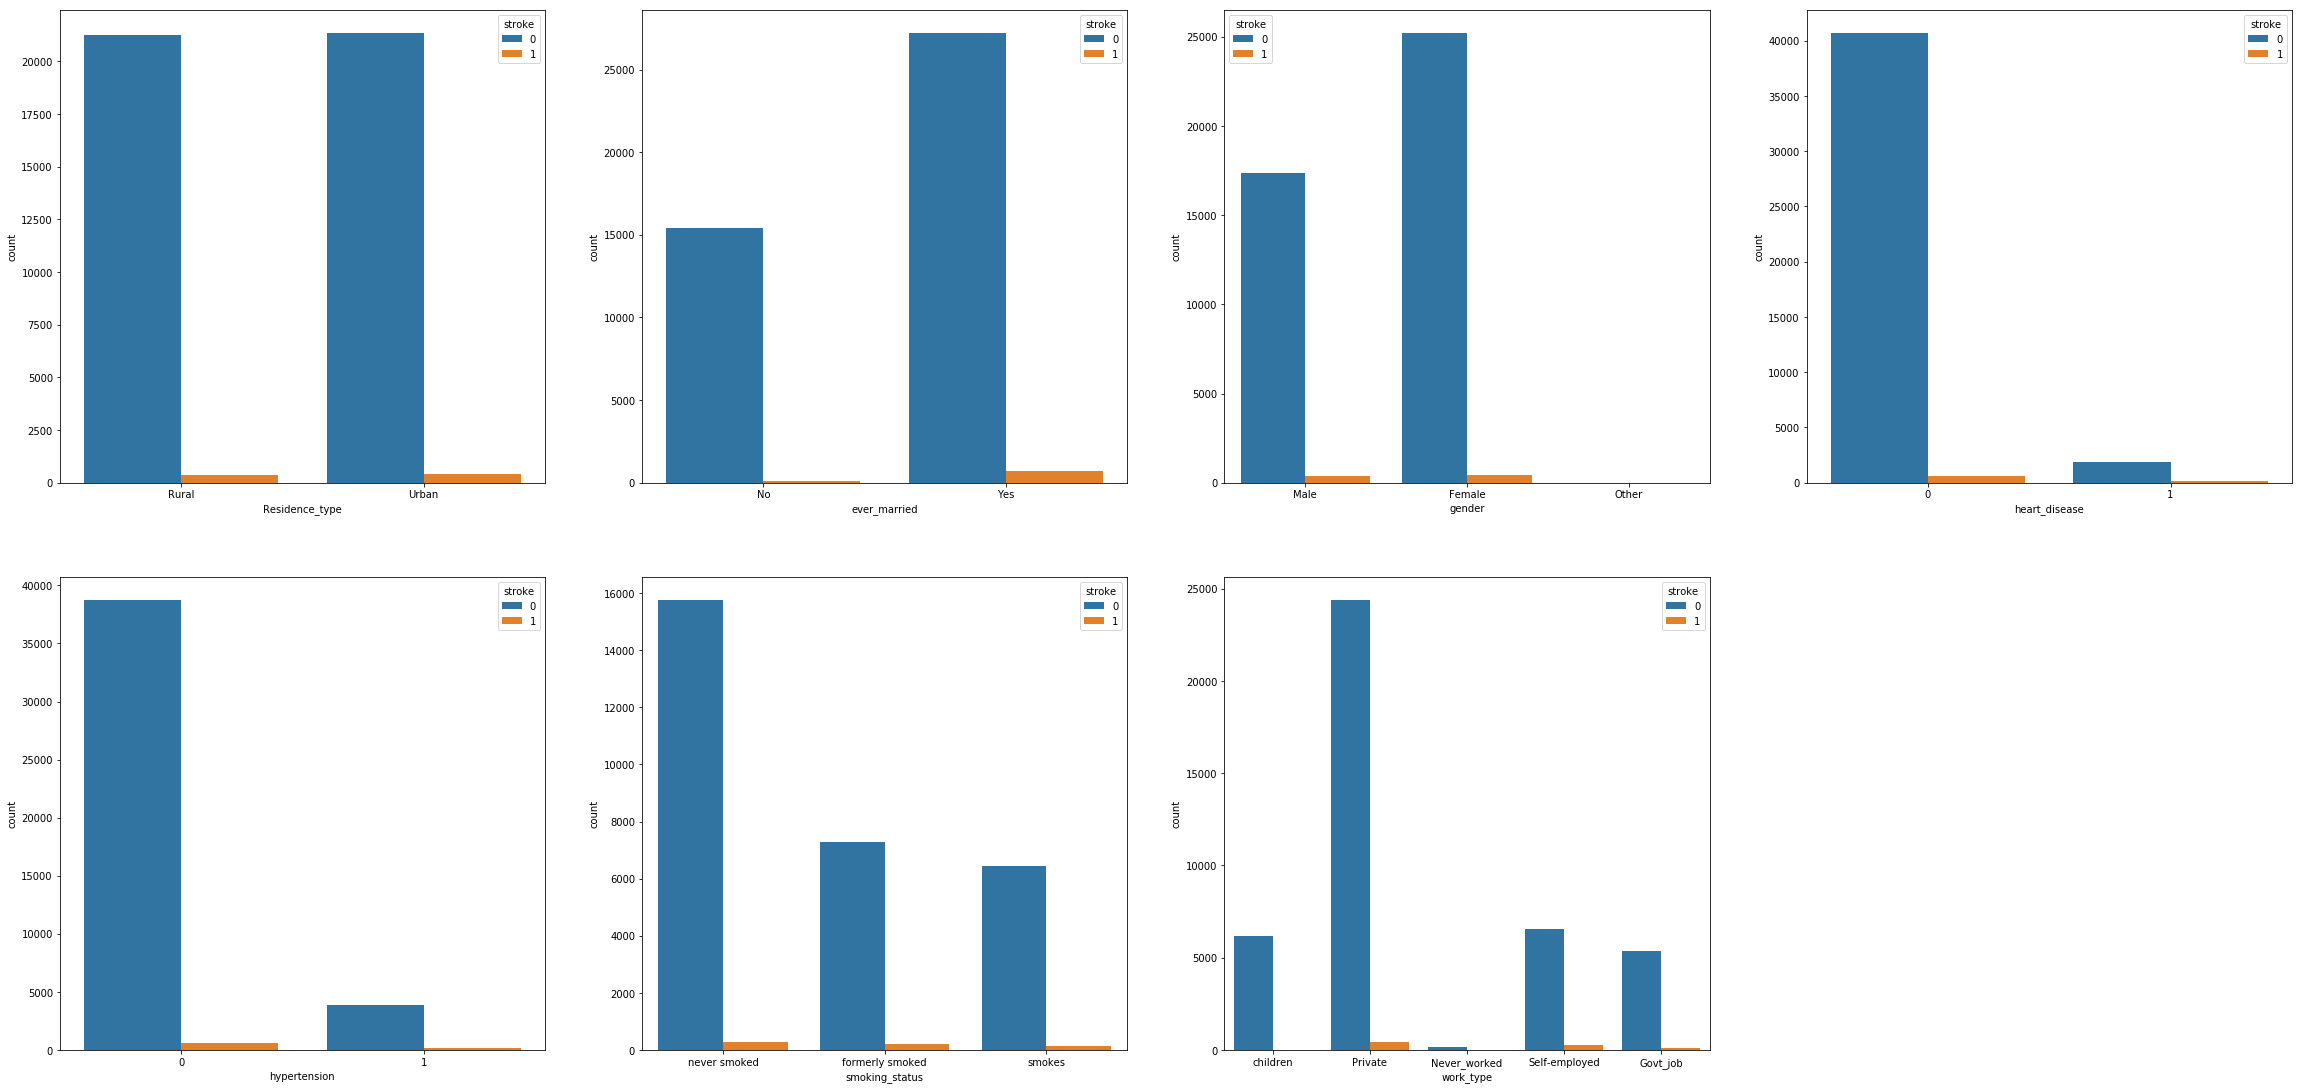

In [16]:
fig = plt.figure(figsize=(40, 40))
i = 1
for col in categ:
    
    if col != 'stroke':
        fig.add_subplot(4,4,i)
        sns.countplot(x=col, data= df,hue='stroke');
        i += 1

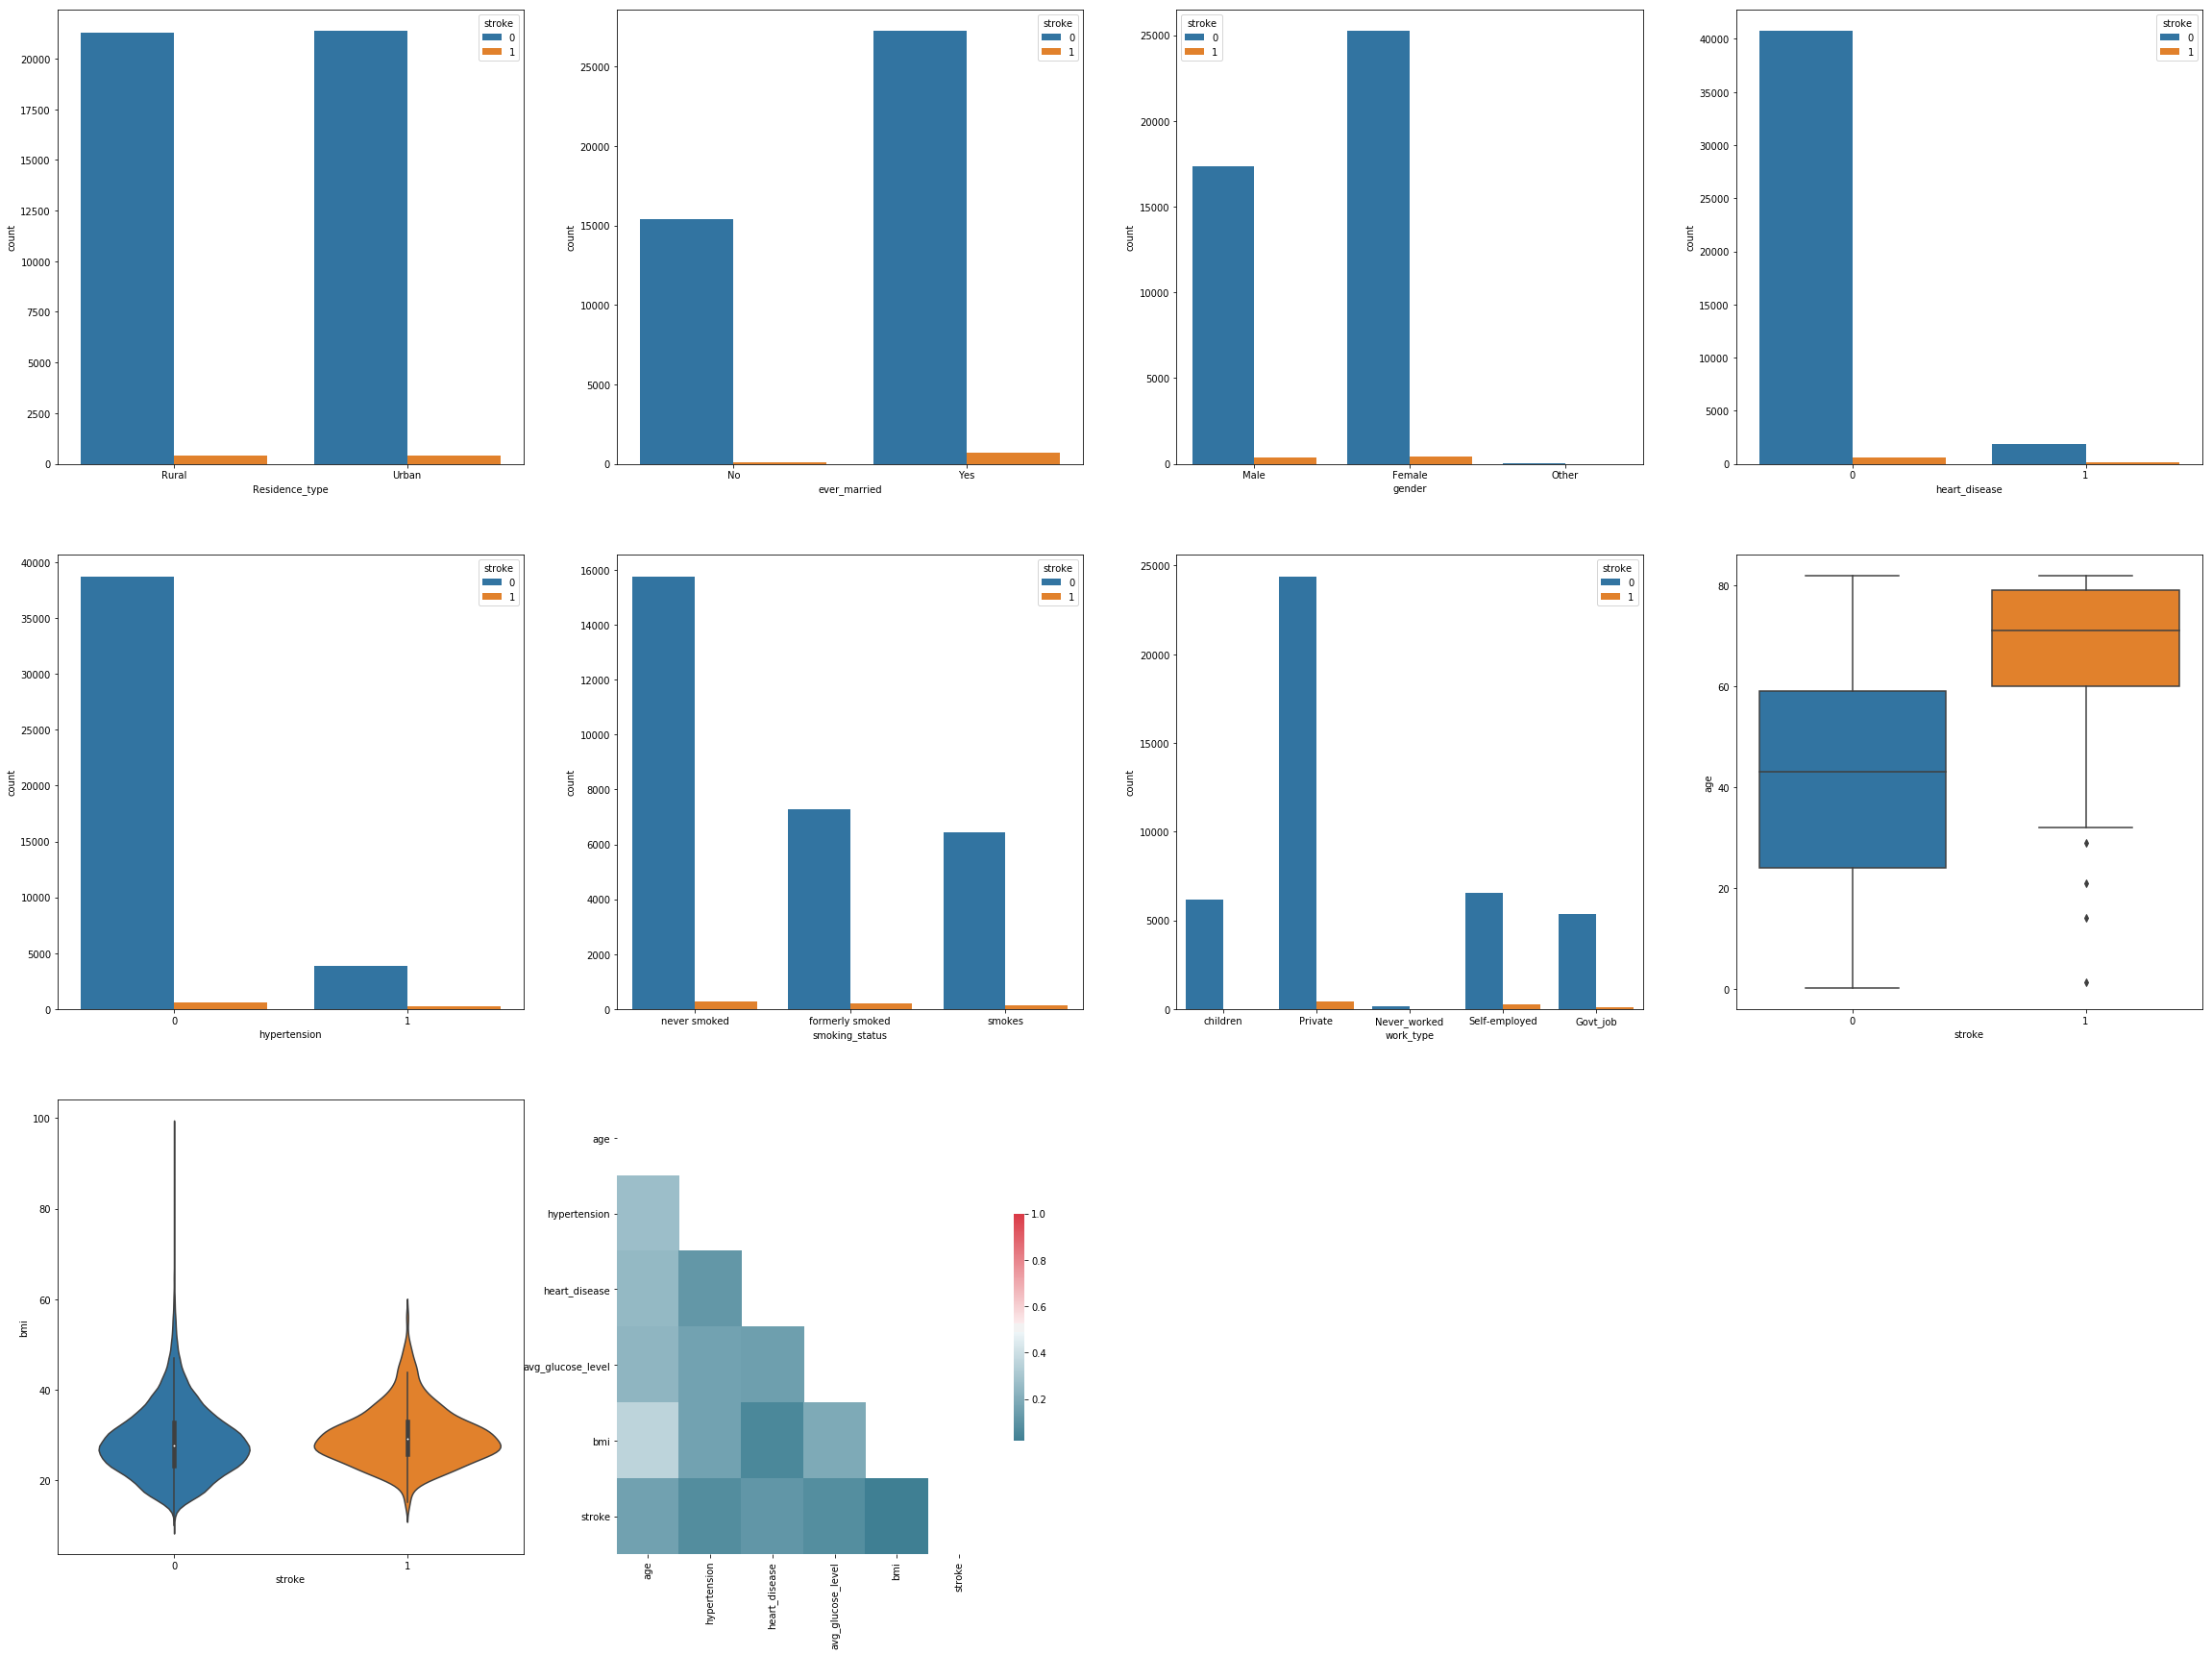

In [17]:
fig = plt.figure(figsize=(40, 40))
i = 1
for col in categ:
    if col != 'stroke':
        fig.add_subplot(4,4,i)
        sns.countplot(x=col, data=df,hue='stroke');
        i += 1
# Box plot survived x age
fig.add_subplot(4,4,8)
sns.boxplot(x="stroke", y="age", data=df)
# fare and Survived
fig.add_subplot(4,4,9)
sns.violinplot(x="stroke", y="bmi", data=df)
# correlations with the new features
corr = df.drop(['id'], axis=1).corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)
fig.add_subplot(4,4,10)
sns.heatmap(corr, mask=mask, cmap=cmap, cbar_kws={"shrink": .5})
plt.show()
fig.clear()

# Impute missing value


values. In general rules a good imputation is the median (for the numerical features). engineering:It will be more interesting different imputations are tested to find the values with the best impact on  metrics. However ,the median is a simple method and i am going with median , as of now.For the categorical features i am imputing the missing
values by the most frequent values.


In [22]:
# bmi
MedianBmi = df.bmi.median()
df.bmi = df.bmi.fillna(value=MedianBmi)


In [25]:
#smoking_status replace NaN with the mode value
Modesmoking_status = df.smoking_status.mode()[0]
df.smoking_status = df.smoking_status.fillna(value=Modesmoking_status)



# Encode Categorical features


I am using `LabelEncoder()` to transform the categorical features in binary features.

In [26]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

In [29]:
df['gender']=le.fit_transform(df['gender'])
df['ever_married'] = le.fit_transform(df['ever_married'])
df['work_type']= le.fit_transform(df['work_type'])
df['Residence_type']= le.fit_transform(df['Residence_type'])
df['smoking_status']= le.fit_transform(df['smoking_status'])

In [30]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,1,3.0,0,0,0,4,0,95.12,18.0,1,0
1,30468,1,58.0,1,0,1,2,1,87.96,39.2,1,0
2,16523,0,8.0,0,0,0,2,1,110.89,17.6,1,0
3,56543,0,70.0,0,0,1,2,0,69.04,35.9,0,0
4,46136,1,14.0,0,0,0,1,0,161.28,19.1,1,0


I am dropping stroke from features as its target, and dropping id , as it should not effect our target.

In [34]:
Target = df.stroke
Features = df.drop(['stroke','id'],axis=1)


 __Comparison of different algorithms__

__Create training and test sets__

In [39]:
from sklearn.model_selection import train_test_split



In [44]:
x_train, x_test, y_train, y_test = train_test_split(Features, Target, 
                                                    test_size=0.2, 
                                                    random_state=123, 
                                                    stratify=Target)

In [46]:
MlRes= {}
def MlResult(model,score):
    MlRes[model]
    roc_curve_data = {}
def ConcatRocData(algoname, fpr, tpr, auc):
    data = [fpr, tpr, auc]
    roc_curve_data[algoname] = data

__Logistic Regression__

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [58]:

# Logistic Regression :
logi_reg = LogisticRegression()
# Fit the regressor to the training data
logi_reg.fit(x_train, y_train)
# Predict on the test data: y_pred
y_pred = logi_reg.predict(x_test)
# Score / Metrics
accuracy = logi_reg.score(x_test, y_test)
accuracy

0.9819124423963134

__Random Forest__

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
# Create a random Forest Classifier instance
rfc = RandomForestClassifier(n_estimators = 100)
# Fit to the training data
rfc.fit(x_train, y_train)
# Predict on the test data: y_pred
y_pred = rfc.predict(x_test)
# Score / Metrics
accuracy = rfc.score(x_test, y_test) 
accuracy

0.9816820276497696

__`Conclusion`__ :
Based on the accuracy scores , both models are almost equally good , as there is not much difference between the scores . Precisely Logistic Regression model can be considered better than Random Forest .